In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from trends_analysis.analysis_trends_package.trend_analysis import TrendAnalyzer

Получаем данные поисковых трендов

In [13]:
keywords = ['NFT']
data = TrendAnalyzer.get_trends_data(keywords=keywords, timeframe='today 5-y')
data

Function get_trends_data completed.


D:\PyCharmProjects\6402staryginva\data_analysis\.venv\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,NFT
date,
2019-11-17,0
2019-11-24,0
2019-12-01,0
2019-12-08,0
2019-12-15,0
...,...
2024-10-20,5
2024-10-27,5
2024-11-03,5


Анализ данных по ключевому слову 'NFT'

In [14]:
python_data = data['NFT']
analyzer = TrendAnalyzer(python_data)

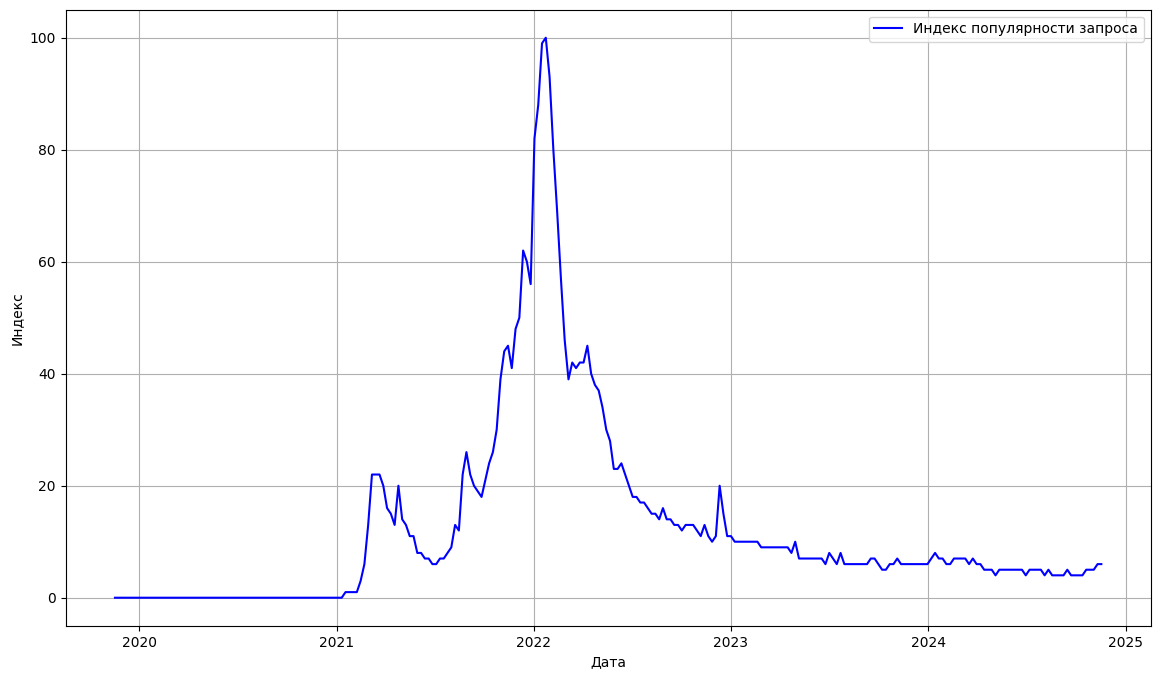

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(python_data.index, python_data, label='Индекс популярности запроса', color='b')
plt.xlabel('Дата')
plt.ylabel('Индекс')
plt.legend(loc='upper right')
plt.grid(True)


Вычисляем скользящее среднее

In [16]:
moving_avg = analyzer.moving_average(window=3)
print("Скользящее среднее:")
moving_avg

Скользящее среднее:


date
2019-11-17         NaN
2019-11-24         NaN
2019-12-01    0.000000
2019-12-08    0.000000
2019-12-15    0.000000
                ...   
2024-10-20    4.333333
2024-10-27    4.666667
2024-11-03    5.000000
2024-11-10    5.333333
2024-11-17    5.666667
Name: Moving Average, Length: 262, dtype: float64

Вычисляем дифференциал

In [17]:
difference = analyzer.difference()
print("Дифференциал:")
difference

Дифференциал:


date
2019-11-17    NaN
2019-11-24    0.0
2019-12-01    0.0
2019-12-08    0.0
2019-12-15    0.0
             ... 
2024-10-20    1.0
2024-10-27    0.0
2024-11-03    0.0
2024-11-10    1.0
2024-11-17    0.0
Name: Differential, Length: 262, dtype: float64

Вычисляем автокорреляцию

In [18]:
autocorr_value = analyzer.autocorrelation(lag=1)
print(f"Автокорреляция: {autocorr_value}")

Автокорреляция: 0.9837802439060996


Находим локальные максимумы и минимумы

In [19]:
extremum_points = analyzer.find_extremium_points()
extremum_points

,Maximum,Minimum
date,,
2019-11-17,NaN,NaN
2019-11-24,NaN,NaN
2019-12-01,NaN,NaN
2019-12-08,NaN,NaN
2019-12-15,NaN,NaN
...,...,...
2024-10-20,NaN,NaN
2024-10-27,NaN,NaN
2024-11-03,NaN,NaN


Сохраняем результаты анализа в Excel-файл

In [20]:
analyzer.save_to_excel("search_trend_analysis_results.xlsx")
print("Результаты сохранены в search_trend_analysis_results.xlsx")

Function save_to_excel completed.
Результаты сохранены в search_trend_analysis_results.xlsx


In [21]:
result_generator = analyzer.generate_results()

result_dict = {}

for name, series in result_generator:
    result_dict[name] = series

all_results_df = pd.DataFrame(result_dict)

all_results_df

Function generate_results completed.


,Moving Average,Differential,Autocorrelation,Maximum,Minimum
date,,,,,
2019-11-17,NaN,NaN,0.98378,NaN,NaN
2019-11-24,NaN,0.0,0.98378,NaN,NaN
2019-12-01,0.000000,0.0,0.98378,NaN,NaN
2019-12-08,0.000000,0.0,0.98378,NaN,NaN
2019-12-15,0.000000,0.0,0.98378,NaN,NaN
...,...,...,...,...,...
2024-10-20,4.333333,1.0,0.98378,NaN,NaN
2024-10-27,4.666667,0.0,0.98378,NaN,NaN
2024-11-03,5.000000,0.0,0.98378,NaN,NaN


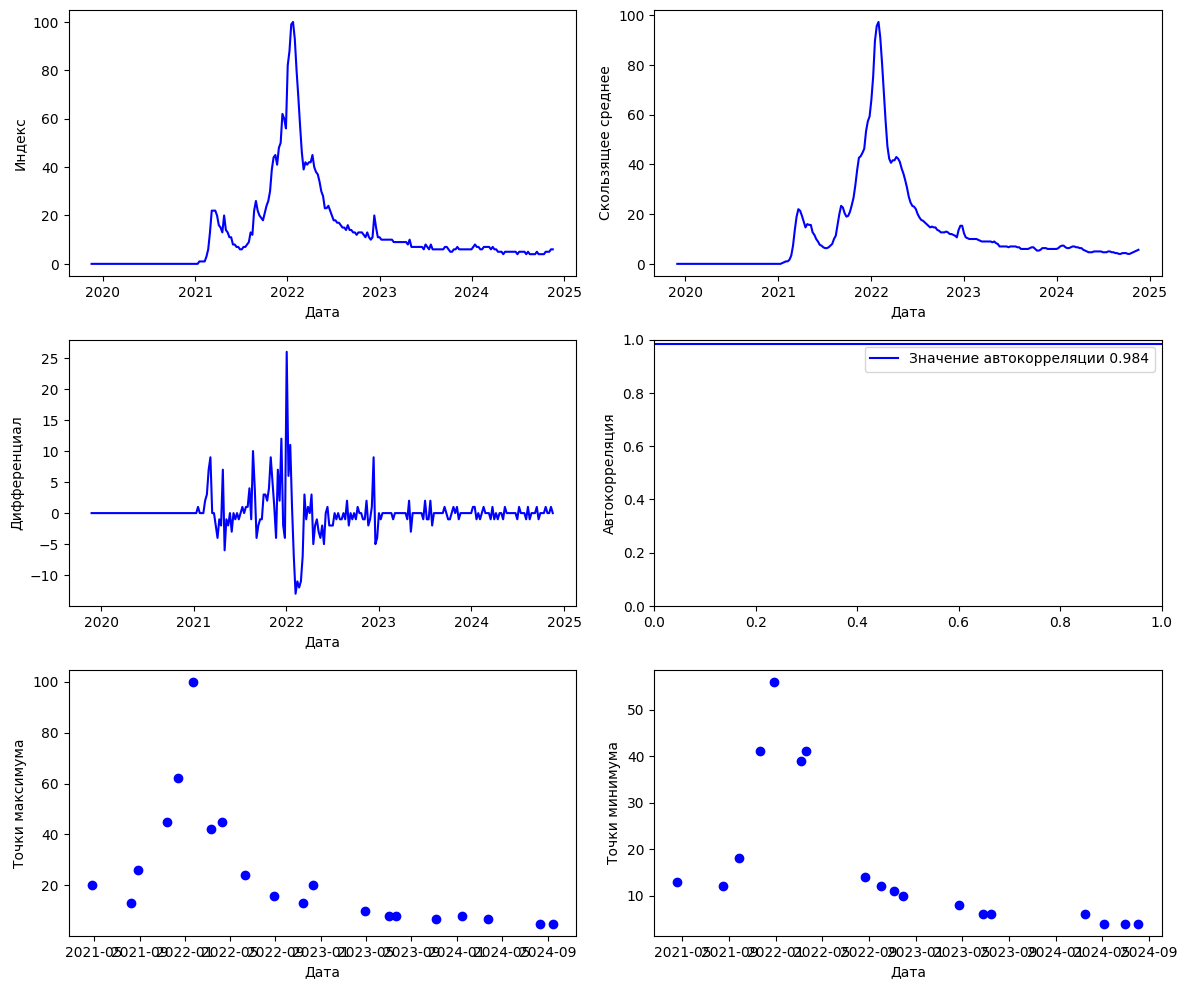

In [22]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(python_data.index, python_data, color='b')
plt.xlabel('Дата')
plt.ylabel('Индекс')


plt.subplot(3, 2, 2)
plt.plot(moving_avg.index, moving_avg, color='b')
plt.xlabel('Дата')
plt.ylabel('Скользящее среднее')


plt.subplot(3, 2, 3)
plt.plot(difference.index, difference, color='b')
plt.xlabel('Дата')
plt.ylabel('Дифференциал')


plt.subplot(3, 2, 4)
plt.axhline(y=autocorr_value, label=f'Значение автокорреляции {autocorr_value:.3f}',color='b')
plt.ylabel('Автокорреляция')
plt.legend(loc='upper right')


plt.subplot(3, 2, 5)
plt.plot(extremum_points['Maximum'].index, extremum_points['Maximum'], marker='o', color='b')
plt.xlabel('Дата')
plt.ylabel('Точки максимума')


plt.subplot(3, 2, 6)
plt.plot(extremum_points['Minimum'].index, extremum_points['Minimum'] , marker='o', color='b')
plt.xlabel('Дата')
plt.ylabel('Точки минимума')

plt.tight_layout()
plt.show()